# Recipe2Cusine


In [113]:
import pandas as pd
import matplotlib as mt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score 

from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

# Explorative Data analysis

In [12]:
#Import data from json IMP.
data = pd.read_json('recipies.json')
data.head(3)

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [38]:
# Count how many recipes for cuisine
different_cusines = data.groupby('cuisine').count().reset_index()
different_cusines

,cuisine,id,ingredients
0,brazilian,467,467
1,british,804,804
2,cajun_creole,1546,1546
3,chinese,2673,2673
4,filipino,755,755
5,french,2646,2646
6,greek,1175,1175
7,indian,3003,3003
8,irish,667,667
9,italian,7838,7838


In [31]:
# Plot and order
sorted_cusines = different_cusines.sort_values(by = 'ingredients', axis=0, ascending = True)

<Figure size 432x288 with 0 Axes>

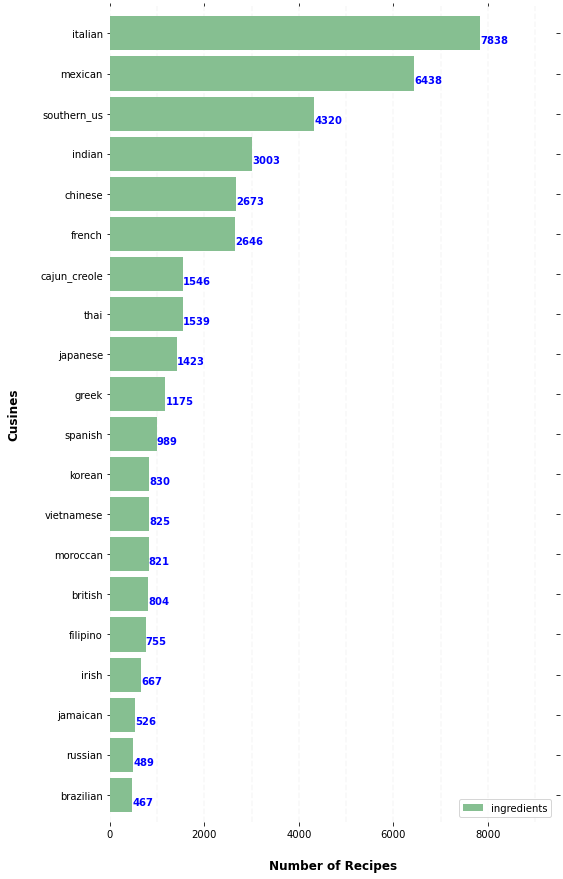

In [33]:
# Plot
fig = plt.figure()

ax = sorted_cusines.plot.barh(x='cuisine', y='ingredients', figsize=(8, 15), color='#86bf91', zorder=2, width=0.85)
#ax = df_selected_species.plot.barh(x='species', y='total_imag', figsize=(8, 8), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Number of Recipes", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Cusines", labelpad=20, weight='bold', size=12)

# Draw values for each bar
for i, v in enumerate(sorted_cusines.ingredients):
    ax.text(v + 3, i - .25, str(v), color='blue', fontweight='bold')

# Legend position    
#ax.legend(loc='upper right', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower right')

# Format y-axis label
#ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.show();

# Saving the figure as an images
#fig.savefig('..\\Analysis\\ImagesPerSpecies.png', bbox_inches='tight', dpi=150)

plt.close(fig)

In [55]:
# List of ingredients per cusine
ingredients_per_cusine = data.groupby('cuisine')['ingredients'].sum().reset_index()
ingredients_per_cusine

,cuisine,ingredients
0,brazilian,"[ice cubes, club soda, white rum, lime, turbin..."
1,british,"[greek yogurt, lemon curd, confectioners sugar..."
2,cajun_creole,"[herbs, lemon juice, fresh tomatoes, paprika, ..."
3,chinese,"[low sodium soy sauce, fresh ginger, dry musta..."
4,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
5,french,"[sugar, salt, fennel bulb, water, lemon olive ..."
6,greek,"[romaine lettuce, black olives, grape tomatoes..."
7,indian,"[water, vegetable oil, wheat, salt, black pepp..."
8,irish,"[cooking spray, salt, black pepper, yukon gold..."
9,italian,"[sugar, pistachio nuts, white almond bark, flo..."


In [56]:
len(ingredients_per_cusine['ingredients'])

20

In [63]:
ingredients_per_cusine['unique_ingr_list'] = ingredients_per_cusine['ingredients'].apply(lambda x: set(x))
ingredients_per_cusine.head(3)

,cuisine,ingredients,unique_ingr_list
0,brazilian,"[ice cubes, club soda, white rum, lime, turbin...","{fine salt, chili paste, green chilies, amber,..."
1,british,"[greek yogurt, lemon curd, confectioners sugar...","{fine salt, cream of tartar, fennel seeds, cap..."
2,cajun_creole,"[herbs, lemon juice, fresh tomatoes, paprika, ...","{low-fat buttermilk, green chilies, canned tom..."


In [70]:
ingredients_per_cusine['count_of_unique_ingrs'] = ingredients_per_cusine['unique_ingr_list'].apply(lambda x: len(x))
ingredients_per_cusine.head(3)

,cuisine,ingredients,unique_ingr_list,count_of_unique_ingrs
0,brazilian,"[ice cubes, club soda, white rum, lime, turbin...","{fine salt, chili paste, green chilies, amber,...",853
1,british,"[greek yogurt, lemon curd, confectioners sugar...","{fine salt, cream of tartar, fennel seeds, cap...",1166
2,cajun_creole,"[herbs, lemon juice, fresh tomatoes, paprika, ...","{low-fat buttermilk, green chilies, canned tom...",1576


In [72]:
ingredients_per_cusine['count2_of_unique_ingrs'] = ingredients_per_cusine['unique_ingr_list'].count()
ingredients_per_cusine.head(3)

,cuisine,ingredients,unique_ingr_list,count_of_unique_ingrs,count2_of_unique_ingrs
0,brazilian,"[ice cubes, club soda, white rum, lime, turbin...","{fine salt, chili paste, green chilies, amber,...",853,20
1,british,"[greek yogurt, lemon curd, confectioners sugar...","{fine salt, cream of tartar, fennel seeds, cap...",1166,20
2,cajun_creole,"[herbs, lemon juice, fresh tomatoes, paprika, ...","{low-fat buttermilk, green chilies, canned tom...",1576,20


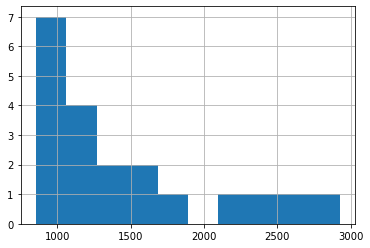

In [67]:
ingredients_per_cusine['count_of_unique_ingrs'].hist()

In [112]:
#convert ingredients lists to strings
data['ingredients_str'] = [', '.join(map(str, l)) for l in data['ingredients']]
data['ingredients_len'] = data['ingredients'].str.len()
data.head()

,cuisine,ingredients,ingredients_str,ingredients_len
id,,,,
10259,greek,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce, black olives, grape tomatoes,...",9
25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour, ground pepper, salt, tomatoes, gr...",11
20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs, pepper, salt, mayonaise, cooking oil, gr...",12
22213,indian,"[water, vegetable oil, wheat, salt]","water, vegetable oil, wheat, salt",4
13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","black pepper, shallots, cornflour, cayenne pep...",20


## WordClouds for Cusine

In [ ]:
#generate wordclouds of ingredients by cuisine
def cuisine2wordcloud(cuisine_name):
    cuisine_df = data.loc[data.cuisine == cuisine_name]
    text = " ".join(desc for desc in cuisine_df.ingredients_str)
    wordcloud = WordCloud(background_color="white").generate(text)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# ML models and Features extraction 

In [77]:
# Subset my data into train (80%) and test (20%)
data = data.set_index('id')
data.head(3)

,cuisine,ingredients
id,,
10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."


In [78]:
# Subset train
df_train = data[:31816] 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31816 entries, 10259 to 40293
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cuisine      31816 non-null  object
 1   ingredients  31816 non-null  object
dtypes: object(2)
memory usage: 745.7+ KB


In [79]:
#Subset test
df_test = data[31817:]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7957 entries, 14920 to 2362
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cuisine      7957 non-null   object
 1   ingredients  7957 non-null   object
dtypes: object(2)
memory usage: 186.5+ KB


In [81]:
# Save indices for training and test
train_indices = df_train.index
test_indices = df_test.index

In [83]:
# Set the target vector from the train
y = df_train['cuisine'].copy()

In [85]:
len(y)

31816

In [110]:
#encode labels as numeric
le = LabelEncoder()
#df['cuisine_numeric'] = le.fit_transform(df.cuisine)
#df.head()
y = le.fit_transform(y)

### Better test and train sampling
Use random sample!!!

In [93]:
# Create the vector of features using the list of ingredients
vectorizer = CountVectorizer()
#X = vectorizer.fit_transform(data['ingredients'])
dummies = vectorizer.fit_transform(df_train['ingredients'].str.join(' '))

In [94]:
dummies

<31816x2890 sparse matrix of type '<class 'numpy.int64'>'
	with 608641 stored elements in Compressed Sparse Row format>

In [108]:
dummies.shape 

(31816, 2890)

In [106]:
# Check the vocabulary (IMP: the numbers are not counts, they are the position in the sparse vector.)
vectorizer.vocabulary_

{'romaine': 2198,
 'lettuce': 1461,
 'black': 236,
 'olives': 1781,
 'grape': 1117,
 'tomatoes': 2659,
 'garlic': 1046,
 'pepper': 1910,
 'purple': 2088,
 'onion': 1785,
 'seasoning': 2303,
 'garbanzo': 1040,
 'beans': 177,
 'feta': 914,
 'cheese': 502,
 'crumbles': 704,
 'plain': 1990,
 'flour': 968,
 'ground': 1152,
 'salt': 2252,
 'thyme': 2637,
 'eggs': 857,
 'green': 1138,
 'yellow': 2864,
 'corn': 647,
 'meal': 1589,
 'milk': 1627,
 'vegetable': 2760,
 'oil': 1773,
 'mayonaise': 1583,
 'cooking': 643,
 'chilies': 530,
 'grilled': 1145,
 'chicken': 516,
 'breasts': 316,
 'powder': 2041,
 'soy': 2442,
 'sauce': 2274,
 'butter': 359,
 'livers': 1486,
 'water': 2805,
 'wheat': 2815,
 'shallots': 2328,
 'cornflour': 652,
 'cayenne': 471,
 'onions': 1786,
 'paste': 1873,
 'lemon': 1452,
 'juice': 1324,
 'chili': 529,
 'passata': 1869,
 'cumin': 727,
 'boneless': 270,
 'skinless': 2390,
 'thigh': 2630,
 'garam': 1039,
 'masala': 1569,
 'double': 809,
 'cream': 676,
 'natural': 1717,
 'y

In [97]:
# Try to go from a sparse representation to compressed
X = pd.DataFrame(dummies.todense(),columns=vectorizer.get_feature_names())

In [111]:
#Try a simple logistic regression
LogisticRegression().fit(X, y)

C:\Users\Michela\Anaconda3\envs\insight\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
#Model evaluation
kfold = model_selection.KFold(n_splits=10, random_state=7)
accuracy_results = model_selection.cross_val_score(LogisticRegression(), X,y, cv=kfold, scoring='accuracy')

C:\Users\Michela\Anaconda3\envs\insight\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Michela\Anaconda3\envs\insight\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [ ]:
print("%s: %f (%f)" % ('LR', accuracy_results.mean(), accuracy_results.std())

In [105]:
#
LinearSVC().fit(X,y)

C:\Users\Michela\Anaconda3\envs\insight\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [ ]:
#Model evaluation
kfold = model_selection.KFold(n_splits=10, random_state=7)
accuracy_results = model_selection.cross_val_score(LinearSVC(), X,y, cv=kfold, scoring='accuracy')

Both model do not converge...Let try PCA to reduce the to 2 dimensions